In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfw = pd.read_csv('./assets/input/weather.csv')
dft = pd.read_csv('./assets/input/train.csv')
dfs = pd.read_csv('./assets/input/spray.csv')
dfw.shape, dft.shape, dfs.shape

((2944, 22), (10506, 12), (14835, 4))

In [3]:
dfw['Date'] = pd.to_datetime(dfw['Date'])
dft['Date'] = pd.to_datetime(dft['Date'])
dfs['Date'] = pd.to_datetime(dfs['Date'])

In [4]:
dft.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [5]:
dfw = dfw[dfw['Tavg'] != 'M']
dfw['Tavg'] = dfw['Tavg'].astype('int')

In [6]:
temp_dict = {}
for i in range(5, 11):
    temp_dict[i] = pd.Series((dfw.groupby(dfw['Date'].dt.month).get_group(i))['Tavg']).mean()
avg_temp = pd.DataFrame(list(temp_dict.items()), index=temp_dict.keys())

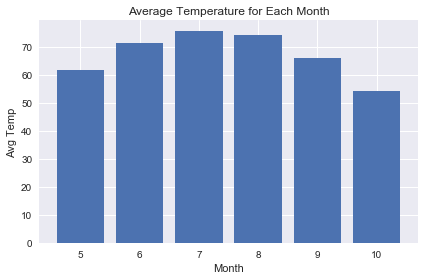

In [7]:
fig = plt.figure()
ax1 = plt.bar(avg_temp[0], avg_temp[1])
plt.xlabel('Month')
plt.ylabel('Avg Temp')
plt.title('Average Temperature for Each Month')
plt.tight_layout();

In [8]:
mos_dict = {}
for i in range(5, 11):
    mos_dict[i] = pd.Series((dft.groupby(dft['Date'].dt.month).get_group(i))['NumMosquitos']).mean()
avg_num_mos = pd.DataFrame(list(mos_dict.items()), index=mos_dict.keys())

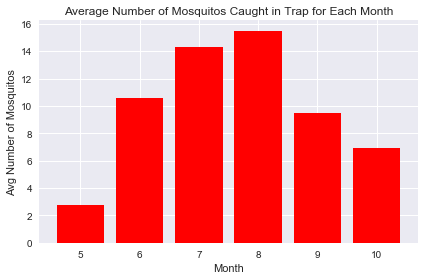

In [9]:
fig = plt.figure()
ax1 = plt.bar(avg_num_mos[0], avg_num_mos[1], color='red')
plt.xlabel('Month')
plt.ylabel('Avg Number of Mosquitos')
plt.title('Average Number of Mosquitos Caught in Trap for Each Month')
plt.tight_layout();

In [10]:
spray_dict = {}
for i in range(7, 10):
    spray_dict[i] = dfs[dfs['Date'].dt.month == i].shape[0]
spray_count = pd.DataFrame(list(spray_dict.items()), index=spray_dict.keys())

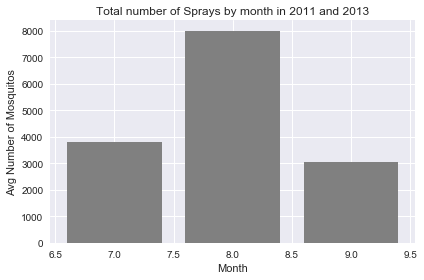

In [11]:
fig = plt.figure()
ax1 = plt.bar(spray_count[0], spray_count[1], color='gray')
plt.xlabel('Month')
plt.ylabel('Avg Number of Mosquitos')
plt.title('Total number of Sprays by month in 2011 and 2013')
plt.tight_layout();

In [12]:
dft.shape, dfw.shape, dfs.shape

((10506, 12), (2933, 22), (14835, 4))

In [13]:
dft[:26]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [14]:
dfs

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [15]:
dfw

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5
10,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0


In [16]:
#Training: 2007, 9, 11, 13
#Spray: 2011, 13
#Weather: 2007, 8, 9, 11, 12, 13

In [17]:
dfs['Date'].groupby([dfs['Date'].dt.year, 
                     dfs['Date'].dt.month]).agg('count')

Date  Date
2011  8         95
      9       2114
2013  7       3809
      8       7893
      9        924
Name: Date, dtype: int64

In [18]:
#Spray record by specific date
dfs['Date'].groupby([dfs['Date'].dt.year, 
                     dfs['Date'].dt.month, 
                     dfs['Date'].dt.date]).agg('count')

Date  Date  Date      
2011  8     2011-08-29      95
      9     2011-09-07    2114
2013  7     2013-07-17    2202
            2013-07-25    1607
      8     2013-08-08    1195
            2013-08-15    2668
            2013-08-16     141
            2013-08-22    1587
            2013-08-29    2302
      9     2013-09-05     924
Name: Date, dtype: int64

In [19]:
#trap count
test = dft['Date'].groupby([dft['Date'].dt.year, 
                     dft['Date'].dt.month,
                     dft['Date'].dt.date]).agg('count')

In [20]:
len(test)

95

In [21]:
list(test)

[25,
 60,
 70,
 46,
 74,
 152,
 129,
 45,
 92,
 83,
 551,
 137,
 5,
 184,
 93,
 26,
 276,
 93,
 54,
 186,
 139,
 186,
 120,
 92,
 91,
 50,
 135,
 93,
 123,
 167,
 23,
 185,
 26,
 59,
 93,
 14,
 77,
 93,
 32,
 93,
 52,
 93,
 31,
 112,
 93,
 71,
 164,
 93,
 83,
 139,
 131,
 105,
 84,
 54,
 55,
 111,
 127,
 125,
 65,
 62,
 107,
 91,
 121,
 146,
 177,
 179,
 138,
 140,
 128,
 119,
 106,
 62,
 50,
 138,
 120,
 109,
 61,
 77,
 121,
 116,
 62,
 60,
 119,
 182,
 182,
 153,
 186,
 181,
 157,
 167,
 143,
 143,
 139,
 112,
 92]

In [22]:
#weather data
dfw['Date'].groupby([dfw['Date'].dt.year, dfw['Date'].dt.month]).agg('count')

Date  Date
2007  5       61
      6       60
      7       62
      8       62
      9       60
      10      62
2008  5       62
      6       60
      7       61
      8       62
      9       60
      10      61
2009  5       62
      6       60
      7       62
      8       62
      9       60
      10      62
2010  5       62
      6       60
      7       62
      8       62
      9       60
      10      62
2011  5       62
      6       60
      7       61
      8       62
      9       60
      10      62
2012  5       62
      6       60
      7       62
      8       61
      9       60
      10      62
2013  5       61
      6       60
      7       62
      8       62
      9       58
      10      61
2014  5       61
      6       60
      7       62
      8       61
      9       60
      10      62
Name: Date, dtype: int64

In [26]:
dft.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [25]:
dft.corr()['WnvPresent']

Block              0.004877
Latitude           0.028697
Longitude         -0.060345
AddressAccuracy    0.008064
NumMosquitos       0.196820
WnvPresent         1.000000
Name: WnvPresent, dtype: float64